# Analysis of testData5

**Author**: Jacopo Ventura

**Date**: 27th October 2017

A predictive model for the feature $t$ is build through the following steps:

1. descriptive statistics of data and first plots to get insights
2. check linear correlation between features
3. separate training and test sets
4. train few machine learning algorithms and select the best one 
5. test the algorithm on the test dataset

In [1]:
# Import packages for data analysis
import os    # OS module provides the interface with the operating system and allows to use it
import tarfile
from six.moves import urllib
import pandas as pd     # Pandas: python library for large data manipulation and analysis. 
                        # Dataset will be saved as Pands dataset
import numpy as np
import matplotlib.pyplot as plt

# this command is very important in Jupyter: figures must be showed directly in the notebook!!!
%matplotlib inline

import seaborn as sns

# disable warnings
import warnings
warnings.filterwarnings("ignore")

# step 1: acquire dataset
data_path='C:/Users/jacopo/Desktop/schaeffler/testData5.csv'
dataset = pd.read_csv(data_path,sep=';')   # dataset as pandas dataset

print('Overview of the dataset: size of dataset and type of data:\n')
dataset.info()


Overview of the dataset: size of dataset and type of data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
a    10000 non-null float64
b    10000 non-null float64
c    10000 non-null float64
d    10000 non-null float64
e    10000 non-null int64
t    10000 non-null int64
dtypes: float64(4), int64(2)
memory usage: 468.8 KB


### Step 1: descriptive statistics of data and first plots

We now get the first insights on data by performing descriptive statistics.

In [2]:
print('\nDescriptive statistics of the dataset:')
dataset.describe()


Descriptive statistics of the dataset:


,a,b,c,d,e,t
count,1.000000e+04,10000.000000,10000.00000,10000.000000,10000.000000,10000.0000
mean,-6.342973e+05,62039.643189,1978.69446,500.534034,-42.806600,0.0157
std,4.251254e+08,35784.507461,2912.26765,289.302811,5795.429143,1.7176
min,-1.246107e+09,-194.930000,-2999.86000,0.010000,-10000.000000,-6.0000
25%,-2.400307e+08,31316.255000,-562.92750,248.090000,-5068.750000,0.0000
50%,9.584788e+04,62048.805000,1990.83500,499.310000,10.000000,0.0000
75%,2.441540e+08,93159.475000,4525.90000,752.260000,4905.250000,1.0000
max,1.230986e+09,123487.750000,6998.86000,999.760000,9999.000000,6.0000


The dataset consists of 10000 instances composed by 5 attributes ( $a$ , $b$ , $c$, $d$, $e$) and the target attribute  $t$. Moreover, **the dataset is complete**, meaning that no missing data (NaN) are present.

The **target feature $t$ is numerical discrete** and assumes integer values in the range $[-6, 6]$. Therefore, linear (or Ridge) regression cannot be applied since the fundamental condition of continuous dependent variable is not verified.

The features $d$ is numerical discrete variables and assumes integer values in the interval $[-10000,9999]$. 


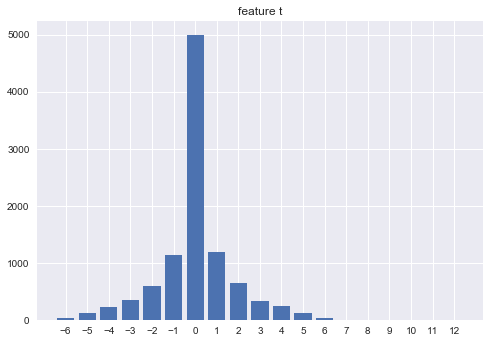

In [5]:
# frequencies of discrete numerical values
import collections


feature_freq = collections.Counter(dataset['t'].values)
# print(feature_freq)
    
dim = len(feature_freq)
dim_0 = -6

        
# create output
feature_t_freq_ordered = [feature_freq[i] for i in range(dim_0,dim)]
feature_t_ordered = [i for i in range(dim_0,dim)]
    



plt.bar(feature_t_ordered,feature_t_freq_ordered)
plt.title('feature t')
plt.xticks(feature_t_ordered) 
plt.show()



### Step 2: Check linear correlation through the Pearson's r coefficient

Let us now check the linear correlation between variables using Pearsons' r. 

As we can observe from the correlation matrix, features $c$ and $d$ are strongly correlated. 

Pearsons r correlation coefficient for t:
t    1.000000
e    0.555834
a    0.516491
d    0.013338
c   -0.000158
b   -0.000802
Name: t, dtype: float64
Pearsons r correlation coefficient for a:
a    1.000000
e    0.871609
t    0.516491
c    0.016640
b    0.005130
d   -0.002705
Name: a, dtype: float64
Display correlation matrix


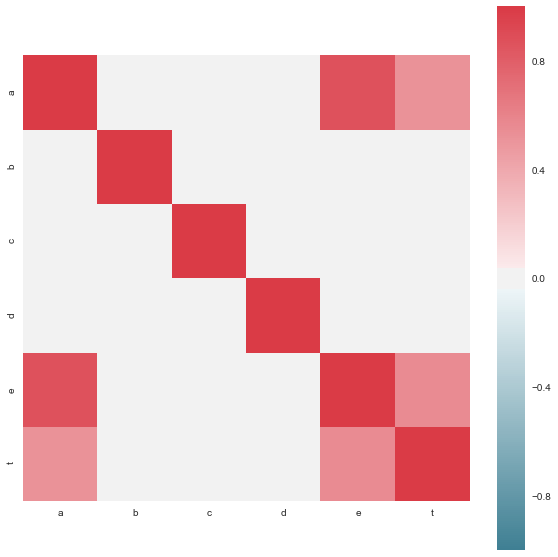

In [7]:
# generate scatter matrix
from pandas.plotting import scatter_matrix

# check linear correlation through Pearson's r
print('Pearsons r correlation coefficient for t:')
corr_matrix = dataset.corr()
print(corr_matrix["t"].sort_values(ascending=False))

print('Pearsons r correlation coefficient for a:')
print(corr_matrix["a"].sort_values(ascending=False))


print('Display correlation matrix')
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_matrix, 
            mask=np.zeros_like(corr_matrix, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

Scatter matrix of data:


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019C79CDF6A0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000019C7CF12F28>]], dtype=object)

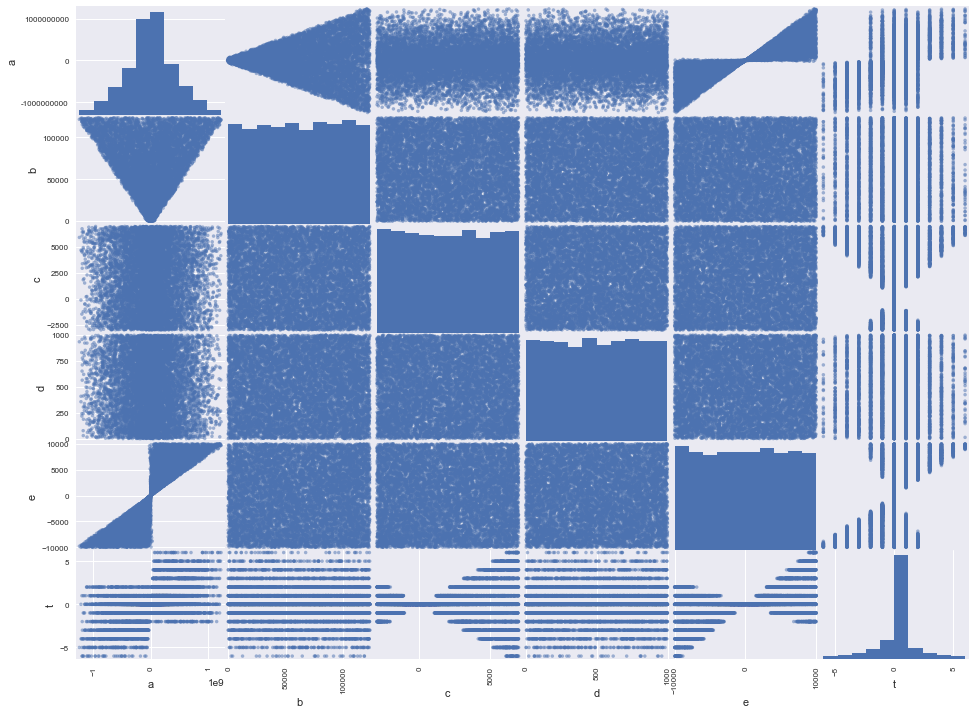

In [8]:
# generate scatter matrix
from pandas.plotting import scatter_matrix

print('Scatter matrix of data:')
scatter_matrix(dataset, figsize=(16, 12))

### Step 3: create training and test datasets

In [9]:
# Generation of train and test dataset by random sampling
from sklearn.cross_validation import train_test_split
 
Features_X = dataset[['a','b','c','d','e']]
Label_Y = dataset['t']
train_Features, test_Features, train_Label, test_Label = train_test_split(Features_X, 
                                                                            Label_Y, 
                                                                            test_size=0.2,
                                                                            random_state=42)

print(len(train_Features), "train +", len(test_Features), "test")

8000 train + 2000 test


D:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Step 4: training of Machine Learning models

The following Machine Learning models are trained:

1. Random Forest
2. kNN

In [10]:
from sklearn.preprocessing import StandardScaler

scaler_Features = StandardScaler().fit(train_Features)
scaler_Label = StandardScaler().fit(train_Label)

train_Features_scaled = scaler_Features.transform(train_Features)
train_Label_scaled = scaler_Label.transform(train_Label)

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [11]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# options for cross validation
score_cross_val = "neg_mean_squared_error"
N_split = 10

# function to display results from cross validation
def display_scores(scores):
    print('Performance measure for cross validation: root mean squared error RMSE')
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [19]:
# 1: Random Forest
from sklearn.ensemble import RandomForestRegressor

# train Random Forest
forest_reg = RandomForestRegressor(n_estimators = 20,
                                   max_depth=None,   
                                   min_weight_fraction_leaf=0.0, 
                                   max_features='auto', 
                                   bootstrap=True,
                                   n_jobs=-1)
                                  


forest_reg.fit(train_Features_scaled, train_Label_scaled)


# cross validation on the training dataset
scores = cross_val_score(forest_reg,train_Features_scaled,
                         train_Label_scaled,
                         scoring=score_cross_val, 
                         cv=N_split)

forest_rmse_scores = np.sqrt(-scores)
display_scores(forest_rmse_scores)

Performance measure for cross validation: root mean squared error RMSE
Mean: 0.096401525957
Standard deviation: 0.0046915843494


In [13]:
# 4: kNN
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor(n_neighbors=20)

knn_reg.fit(train_Features_scaled, train_Label_scaled)

# cross validation on the training dataset
scores = cross_val_score(knn_reg,train_Features_scaled,
                         train_Label_scaled,
                         scoring=score_cross_val, 
                         cv=N_split)

forest_rmse_scores = np.sqrt(-scores)
display_scores(forest_rmse_scores)

Performance measure for cross validation: root mean squared error RMSE
Mean: 0.200751125438
Standard deviation: 0.00873719834861


Random forest regressor ensures the lowest RMSE and therefore is the selected method for predicting $t$.

## Step 5: test on test dataset

In [16]:
y_predicted = forest_reg.predict(train_Features_scaled)


# test on the test dataset
test_Features_scaled = scaler_Features.transform(test_Features)
test_Label_scaled = scaler_Label.transform(test_Label)
y_predicted_test = forest_reg.predict(test_Features_scaled)

print('\nPerformance (RMSE) on the test dataset:')
print(np.sqrt(mean_squared_error(test_Label_scaled,y_predicted_test)))


Performance (RMSE) on the train dataset:
0.0342098250334

Performance (RMSE) on the test dataset:
0.0892713519601


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
